In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import iSDR_cython as ciSDR
np.random.seed(12)

# Define sensor and source space

In [2]:
n_t = 200
n_c, n_s = 3,3
np.random.seed(40)
G = np.abs(np.random.normal(0,1,(n_c, n_s)))
J = np.zeros((n_s, n_t))
J[:, 0] = [10, 0.1, 0]
A = np.array([[0.9,-0.4,0], [0.25, 0.97,0],[0,0,0]])
for i in range(J.shape[-1]-1):
    J[:, i+1] = np.dot(A, J[:, i])
    

# Ground truth

(0, 200)

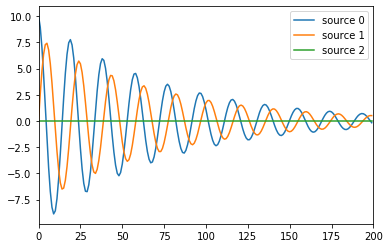

In [3]:
plt.plot(J.T)
plt.legend(['source %s'%s for s in range(n_s)])
plt.xlim(0, n_t)

# Define the structural connectivity

In [4]:
SC = np.array([[1,1,0], [1,1,0],[0,0,1]])
print( SC)

[[1 1 0]
 [1 1 0]
 [0 0 1]]


# Example 1: iSDR order 1

## Generate EEG/MEG data

In [5]:
m_p = 1
M = np.dot(G, J[:, m_p:])

## Run ISDR

In [6]:
cl = ciSDR.linear_model.iSDR(l21_ratio=0.1, la=1e-3)
cl.solver(G, M, SC, nbr_iter=10, model_p=1, A=np.eye(n_s), method='lasso')
R = cl.coef_

Iteration 0: nbr of active sources 3
Iteration 1: nbr of active sources 2


## Get eigenvalues of MVAR model

In [7]:
cl.get_phi()
cl.eigs

,real,imag
eig,,
eig_0,0.937373,0.314641
eig_1,0.937373,-0.314641


## Plot effective connectivity

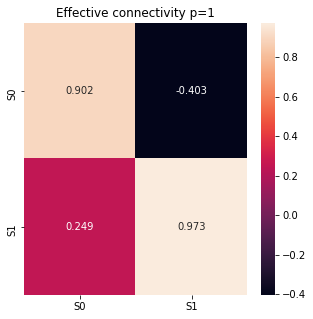

In [8]:
cl.plot_effective()

## Reconstruct the brain activation

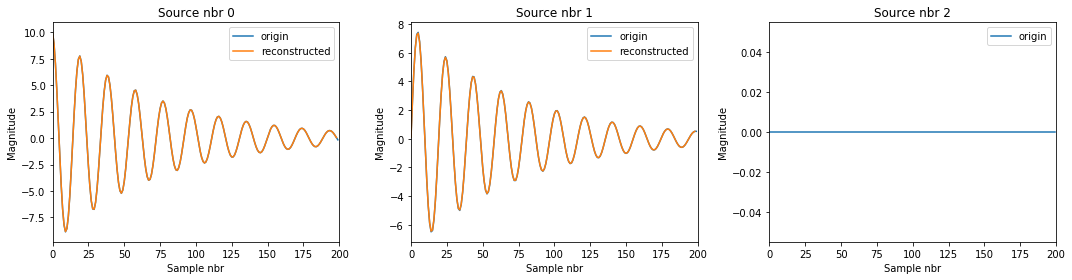

In [9]:
plt.figure(figsize=(15,4))
for i in range(n_s):
    plt.subplot(1,n_s, i+1)
    plt.plot(J[i, :], label='origin')
    if i < R.shape[0]:
        plt.plot(R[i, m_p-1:], label='reconstructed')
    plt.title('Source nbr %s'%i)
    plt.xlim(0, J.shape[1])
    plt.xlabel('Sample nbr')
    plt.ylabel('Magnitude')
    plt.legend()
plt.tight_layout()

## Reconstruct the brain activation using the estimated MVAR model

In [10]:
for i in range(m_p, n_t - m_p):
    R[:, i] = 0
    x = R.shape[0]
    for j in range(m_p):
        R[:, i] += np.dot(cl.Acoef_[:, j*x:(j+1)*x], R[:, i - m_p + j]) 

(0, 200)

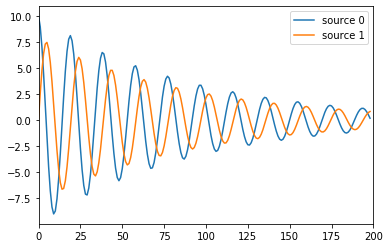

In [11]:
plt.plot(R.T)
plt.legend(['source %s'%s for s in cl.active_set[-1]])
plt.xlim(0, n_t)

# Example 2: iSDR order 3

## Initialize MVAR model

In [12]:
m_p = 3
Atmp = np.zeros((n_s, n_s*m_p))
Atmp[:, -n_s:] = np.eye(n_s)

## Run iSDR

In [13]:
cl = ciSDR.linear_model.iSDR(l21_ratio=0.1, la=1e-3)
cl.solver(G, M, SC, nbr_iter=10, model_p=m_p, A=Atmp, method='lasso')
R = cl.coef_

Iteration 0: nbr of active sources 3
Iteration 1: nbr of active sources 2


/Users/EEALBRB/workspace/iSDR_cython/src/iSDR_cython/linear_model.py:119: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.480713362211656, tolerance: 0.01518013969898867
  check_random_state(self.random_state), random)


## Compute eigenvalues of MVAR model

In [14]:
cl.get_phi()
cl.eigs

,real,imag
eig,,
eig_0,0.935802,0.314421
eig_1,0.935802,-0.314421
eig_2,-0.724004,0.630012
eig_3,-0.724004,-0.630012
eig_4,-0.194827,0.938671
eig_5,-0.194827,-0.938671


## Plot effective connectivity

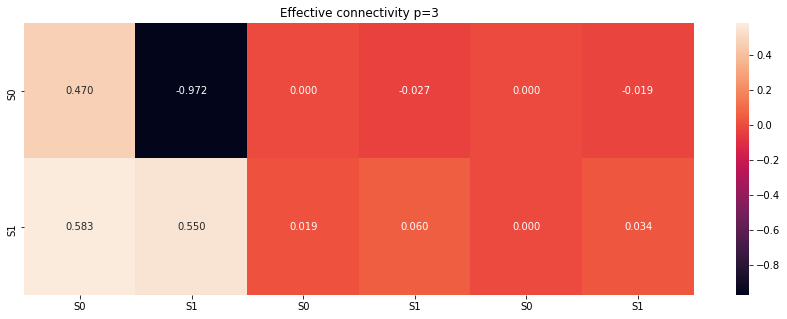

In [15]:
cl.plot_effective()

## Reconstruct the brain activation

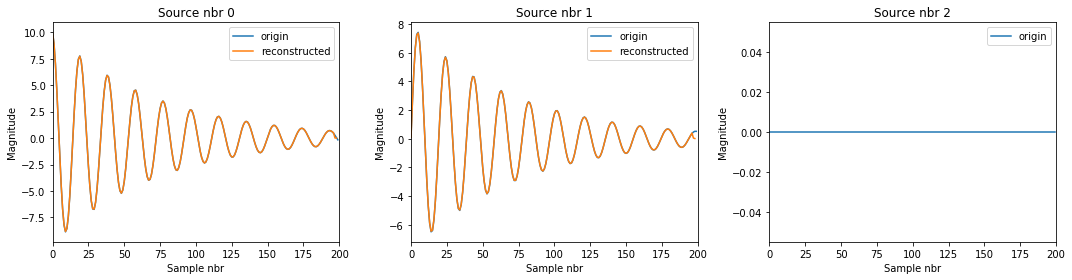

In [16]:
plt.figure(figsize=(15,4))
for i in range(n_s):
    plt.subplot(1,n_s, i+1)
    plt.plot(J[i, :], label='origin')
    if i < R.shape[0]:
        plt.plot(R[i, m_p - 1:], label='reconstructed')
    plt.title('Source nbr %s'%i)
    plt.xlim(0, J.shape[1])
    plt.xlabel('Sample nbr')
    plt.ylabel('Magnitude')
    plt.legend()
plt.tight_layout()

## Reconstruct the brain activation using the estimated MVAR model

In [17]:
for i in range(m_p, n_t):
    R[:, i] = 0
    x = R.shape[0]
    for j in range(m_p):
        R[:, i] += np.dot(cl.Acoef_[:, j*x:(j+1)*x], R[:, i - m_p + j]) 

(0, 200)

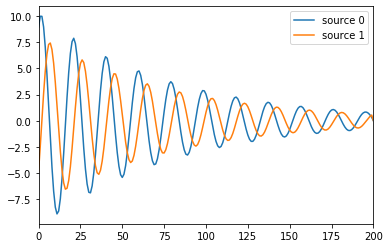

In [18]:
plt.plot(R.T)
plt.legend(['source %s'%s for s in cl.active_set[-1]])
plt.xlim(0, n_t)